# VERZEO MAJOR PROJECT

### Done by - Gowtham.V.R

## The given task at hand

### Problem statement :- For a given dataset (problem) which is the best classification algorithm (as per accuracy)

### We need to work on ensemble learning (modelling) on the questions at hand

### The questions that i've asked were
 1) What is the most and the least used colour in the link_colour and the sidebar_colour column by all genders (brands included)?
 
 2) What is the top 20 most used words and top 20 least used words (brands included) ?

### The classification algorithms that i've used are:
1) Ridge Classifier 

2) SGD Classifier

3) Logistic regression

* I have managed to plot the accuracies of all the classifiers.

### I have used the model_test() to run logistic regression and found out accuracy for that, once that is done, I pass that on to the predictor function to find the most and the least used link_colour or words.



### the functions created to facilitate the finding of the accuracy
* coloursGraphs() - The colourGraphs function plots the most used colours by     gender in 3 bar graphs
* predictors() - This function takes a dataframe, a specific feature (string)     and a model and performs the gender prediction. Set is split in 5 for cross-   validation
* compute_bag_of_words() - This function returns a table with the number of       occurences of a word in the text and will return the vocabulary of all the     different words
* model_test() - The model_test is used to extract the best word predictors and   anti-predictors for each gender. The model used must have have a               coef_attribute representing the weight of each word
* print_most_frequent() - This function is used to find out which words are       being used the most by the respective genders
* text_normalizer() - This function is used to normalize the text by using       strings, lowercases and by removing all the punctuations

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
from IPython.display import display
import re

%matplotlib inline 
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import ndimage

from matplotlib import pyplot as plt
# 3D visualization
import pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

from collections import Counter


from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from IPython.display import display
from sklearn import linear_model, metrics
from sklearn import naive_bayes
from sklearn import neural_network

## Loading data

### Before we start our exploratory data analysis, let's create a data dictionary that explains what the columns are.

* unitid: a unique id for user
* _golden: whether the user was included in the gold standard for the model; TRUE or FALSE
* unitstate: state of the observation; one of finalized (for contributor-judged) or golden (for gold standard observations)
* trustedjudgments: number of trusted judgments (int); always 3 for non-golden, and what may be a unique id for gold standard observations
* lastjudgment_at: date and time of last contributor judgment; blank for gold standard observations
* gender: one of male, female, or brand (for non-human profiles)
* gender:confidence: a float representing confidence in the provided gender
* profile_yn: "no" here seems to mean that the profile was meant to be part of the dataset but was not available when contributors went to judge it
* profile_yn:confidence: confidence in the existence/non-existence of the profile
* created: date and time when the profile was created
* description: the user's profile description
* fav_number: number of tweets the user has favorited
* gender_gold: if the profile is golden, what is the gender?
* link_color: the link color on the profile, as a hex value
* name: the user's name
* profileyngold: whether the profile y/n value is golden
* profileimage: a link to the profile image
* retweet_count: number of times the user has retweeted (or possibly, been retweeted)
* sidebar_color: color of the profile sidebar, as a hex value
* text: text of a random one of the user's tweets
* tweet_coord: if the user has location turned on, the coordinates as a string with the format "[latitude, longitude]"
* tweet_count: number of tweets that the user has posted
* tweet_created: when the random tweet (in the text column) was created
* tweet_id: the tweet id of the random tweet
* tweet_location: location of the tweet; seems to not be particularly normalized
* user_timezone: the timezone of the user

In [2]:
# we need latin-1 encoding because there are some special characters (é,...) that do not fit in default UTF-8
df = pd.read_csv("Information.csv", encoding='latin1')
df.shape

(20050, 26)

In [3]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN


In [4]:
df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

# Colour feature exploration

I plan on using the _link_colour_ and _sidebar_colour_. Twitter has an option of personalising one's account by changing the colours of the links or the siedbars, and my idea is that people from different genders have different behaviors in how they personalize their page.

I am writing a function coloursGraphs() which will plot the most used colours by gender in 3 bar graphs.

In [5]:
def coloursGraphs(df, feature, genderConfidence = 1, nbToRemove = 1):

    dfCol = df.loc[:,['gender:confidence', 'gender', feature]] #Remove weird values : E+17...
    dfColFiltered = dfCol[(dfCol['gender:confidence'] >= genderConfidence)&((dfCol[feature]).str.contains('E\+') != True)]   
    dfColFilteredMale = dfColFiltered[dfColFiltered['gender'] == 'male']
    dfColFilteredFemale = dfColFiltered[dfColFiltered['gender'] == 'female']
    dfColFilteredBrand = dfColFiltered[dfColFiltered['gender'] == 'brand']
    
    colorMale = dfColFilteredMale[feature]
    colorFemale = dfColFilteredFemale[feature]
    colorBrand = dfColFilteredBrand[feature]
    
    listMale = list(colorMale.values.flatten())
    listFemale = list(colorFemale.values.flatten())
    listBrand = list(colorBrand.values.flatten())
        
    nCommon = 30
    commonFemale = Counter(listFemale).most_common(nCommon)
    commonMale = Counter(listMale).most_common(nCommon)
    commonBrand = Counter(listBrand).most_common(nCommon)
    
   
    del commonFemale[0:nbToRemove]
    del commonMale[0:nbToRemove]
    del commonBrand[0:nbToRemove]
    
    colorsFemale = [x[0] for x in commonFemale]
    colorsMale = [x[0] for x in commonMale]
    colorsBrand = [x[0] for x in commonBrand]
    
    colorsNumbFemale = [x[1] for x in commonFemale]
    colorsNumbMale = [x[1] for x in commonMale]
    colorsNumbBrand = [x[1] for x in commonBrand]
    
    colorsHexFemale = ['#' + x + '000000' for x in colorsFemale]
    colorsHexFemale = [x[0:7] for x in colorsHexFemale]
    colorsHexMale = ['#' + x + '000000' for x in colorsMale]
    colorsHexMale = [x[0:7] for x in colorsHexMale]
    colorsHexBrand = ['#' + x + '000000' for x in colorsBrand]
    colorsHexBrand = [x[0:7] for x in colorsHexBrand]
    
    rangeColFemale = list(range(len(colorsFemale)))
    rangeColMale = list(range(len(colorsMale)))
    rangeColBrand = list(range(len(colorsBrand)))
    
    fig1, ax1 = plt.subplots()
    
    bar_width = 0.5
    rects1 = plt.barh(rangeColFemale, colorsNumbFemale, bar_width, label = 'Female', color = colorsHexFemale)
    plt.yticks(rangeColFemale, colorsHexFemale)
    plt.xlabel('Color')
    plt.ylabel(feature)
    plt.title('Most used colors by Females for ' + feature + '\n' + str(nbToRemove) + ' most common occurences removed')
    plt.tight_layout()
    plt.show()
    
    fig2, ax2 = plt.subplots()
    
    bar_width = 0.5
    rects1 = plt.barh(rangeColMale, colorsNumbMale, bar_width, label = 'Male', color = colorsHexMale)
    plt.yticks(rangeColMale, colorsHexMale)
    plt.xlabel('Color')
    plt.ylabel(feature)
    plt.title('Most used colors by Males for ' + feature + '\n' + str(nbToRemove) + ' most common occurences removed')
    plt.tight_layout()
    plt.show()
    
    
    fig3, ax3 = plt.subplots()
    bar_width = 0.5
    rects1 = plt.barh(rangeColBrand, colorsNumbBrand, bar_width, label = 'Brand', color = colorsHexBrand)
    plt.yticks(rangeColBrand, colorsHexBrand)
    plt.xlabel('Color')
    plt.ylabel(feature)
    plt.title('Most used colors by Brands for ' + feature + '\n' + str(nbToRemove) + ' most common occurences removed')
    plt.tight_layout()
    plt.show()



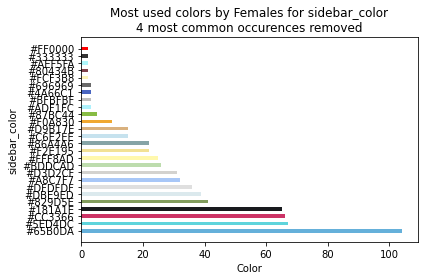

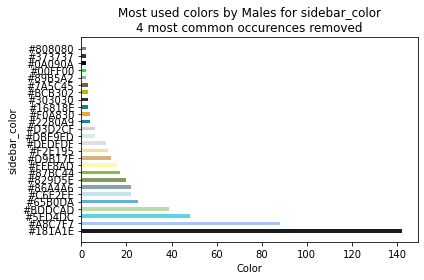

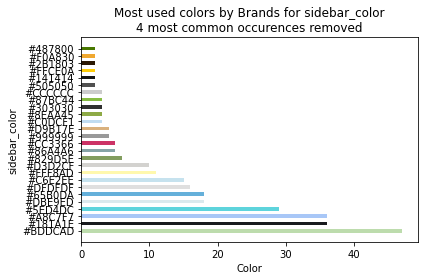

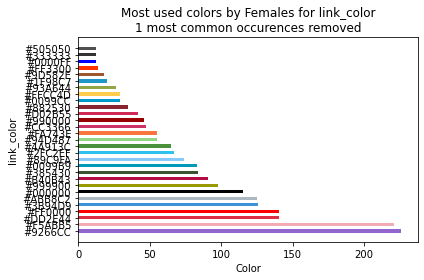

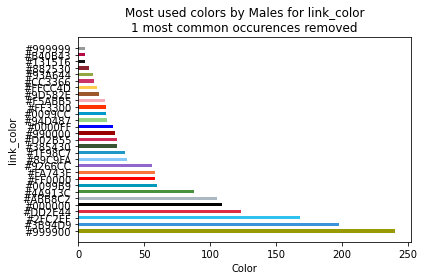

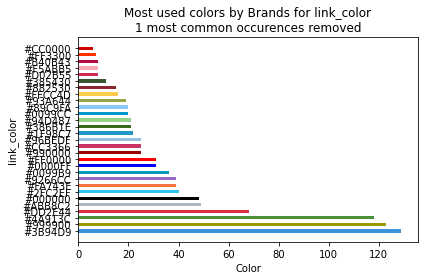

In [6]:
#Data Exploration Colors
coloursGraphs(df, 'sidebar_color', 1, 4)
coloursGraphs(df, 'link_color', 1, 1)

From the graphs, we can make the following conclusions:

* Users changed their link colour more than their sidebar colour
* Female users preferred purple, pink and red.
* Male users preferred green and blue
* Brands used green and blue a lot as well.

## Now we write certain functions to help us

In [7]:
def predictors(df, feature, model, modelname, displayResults = True, displayColors = False):
    print('Testing', modelname, 'model for gender prediction using', feature)
    full_bow, full_voc = compute_bag_of_words(df[feature])
    X = full_bow
    y = LabelEncoder().fit_transform(df['gender'])
    # Create Training and testing sets.
    n,d = X.shape
    test_size = n // 5
    print('Split: {} testing and {} training samples'.format(test_size, y.size - test_size))
    perm = np.random.permutation(y.size)
    X_test  = X[perm[:test_size]]
    X_train = X[perm[test_size:]]
    y_test  = y[perm[:test_size]]
    y_train = y[perm[test_size:]]
    print('model: ', modelname)
    model, acc = model_test(model,X_train,y_train,X_test,y_test, full_voc, displayResults = displayResults, displayColors = displayColors, featureIntent = feature)
    
    return model, full_voc, acc

In [8]:
def compute_bag_of_words(text):
    vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform(text)
    vocabulary = vectorizer.get_feature_names()
    return vectors, vocabulary

In [9]:
def model_test(model,X_train,y_train,X_test,y_test, full_voc, displayResults = True, displayColors = False, featureIntent = 'text'):
    
   
        
    switcher = {
        'all_text' : "text",
        'link_color' : "theme color",
    }
    featureText =  switcher.get(featureIntent, '')
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    # compute MSE
    mse = metrics.mean_squared_error(y_test,y_pred)
    print('mse: {:.4f}'.format(mse))

    # Prints the accuracy of the gender prediction
    acc = model.score(X_test,y_test)
    print('score: ', acc)
    
    
    if(displayResults&hasattr(model,'coef_')):
    # W contain the weight for each predictor, for each gender
        W = model.coef_
    
        
        
        
        # Male Predictors 
        print('Best 20 male predictors:')
        idx_male = np.argsort((W[2,:]))
        weight_male_pred = np.zeros(20)
        male_pred_label = ["" for x in range(20)]
        for i in range(20):
            j = idx_male[-1-i]
            weight_male_pred[i] = W[2,j]
            male_pred_label[i] = full_voc[j]
    
        fig1, ax1 = plt.subplots()
    
        bar_width = 0.5
        pred_number = np.arange(20)+1
        if(displayColors):
            colorsHexMale = ['#' + x + '000000' for x in male_pred_label]
            colorsHexMale = [x[0:7] for x in colorsHexMale] 
            rects1 = plt.barh(pred_number,weight_male_pred, bar_width, label = 'Male Predictors', color = colorsHexMale)  
            plt.yticks(pred_number,colorsHexMale)
        else:
            rects1 = plt.barh(pred_number,weight_male_pred, bar_width, label = 'Male Predictors', color = '#0084b4')
            plt.yticks(pred_number,male_pred_label)
        plt.xlabel('Predictor')
        plt.ylabel('Weight')
        plt.title('Best 20 male predictors for ' + featureText)
        plt.tight_layout()
        plt.show()
       
        
        
        # Male Anti-Predictors    
        print('Best 20 male anti-predictors  for ' + featureText + ':')
        idx_male = np.argsort(-(W[2,:]))
        weight_male_antipred = np.zeros(20)
        male_antipred_label = ["" for x in range(20)]
        for i in range(20):
            j = idx_male[-1-i]
            weight_male_antipred[i] = W[2,j]
            male_antipred_label[i] = full_voc[j]
    
        fig2, ax2 = plt.subplots()
    
        bar_width = 0.5
        pred_number = np.arange(20)+1
        if(displayColors):
            colorsHexMaleAnti = ['#' + x + '000000' for x in male_antipred_label]
            colorsHexMaleAnti = [x[0:7] for x in colorsHexMaleAnti] 
            rects1 = plt.barh(pred_number,weight_male_antipred, bar_width, label = 'Male Anti-Predictors', color = colorsHexMaleAnti)
            plt.yticks(pred_number,colorsHexMaleAnti)
        else:
            rects1 = plt.barh(pred_number,weight_male_antipred, bar_width, label = 'Male Anti-Predictors', color = '#0084b4')
            plt.yticks(pred_number,male_antipred_label)
        plt.xlabel('Anti-Predictor')
        plt.ylabel('Weight')
        plt.title('Best 20 male anti-predictors for ' + featureText)
        plt.tight_layout()
        plt.show()
        
        
        
        # Female Predictors    
        print('Best 20 female predictors  for ' + featureText + ':')
        idx_female = np.argsort((W[1,:]))
        weight_female_pred = np.zeros(20)
        female_pred_label = ["" for x in range(20)]
        for i in range(20):
            j = idx_female[-1-i]
            weight_female_pred[i] = W[1,j]
            female_pred_label[i] = full_voc[j]
    
        fig3, ax3 = plt.subplots()
    
        bar_width = 0.5
        pred_number = np.arange(20)+1
        if(displayColors):
            colorsHexFemale = ['#' + x + '000000' for x in female_pred_label]
            colorsHexFemale = [x[0:7] for x in colorsHexFemale] 
            rects1 = plt.barh(pred_number,weight_female_pred, bar_width, label = 'Female Predictors', color = colorsHexFemale)  
            plt.yticks(pred_number,colorsHexFemale)
        else:
            rects1 = plt.barh(pred_number,weight_female_pred, bar_width, label = 'Female Predictors', color = '#f5abb5')
            plt.yticks(pred_number,female_pred_label)
        plt.xlabel('Predictor')
        plt.ylabel('Weight')
        plt.title('Best 20 Female predictors for ' + featureText)
        plt.tight_layout()
        plt.show()
        
        
        
        # Female Anti-Predictors    
        print('Best 20 Female anti-predictors for ' + featureText + ':')
        idx_female = np.argsort(-(W[1,:]))
        weight_female_antipred = np.zeros(20)
        female_antipred_label = ["" for x in range(20)]
        for i in range(20):
            j = idx_female[-1-i]
            weight_female_antipred[i] = W[1,j]
            female_antipred_label[i] = full_voc[j]
    
        fig4, ax4 = plt.subplots()
    
        bar_width = 0.5
        pred_number = np.arange(20)+1
        if(displayColors):
            colorsHexFemaleAnti = ['#' + x + '000000' for x in female_antipred_label]
            colorsHexFemaleAnti = [x[0:7] for x in colorsHexFemaleAnti] 
            rects1 = plt.barh(pred_number,weight_female_antipred, bar_width, label = 'Female Anti-Predictors', color = colorsHexFemaleAnti)  
            plt.yticks(pred_number,colorsHexFemaleAnti)
        else:
            rects1 = plt.barh(pred_number,weight_female_antipred, bar_width, label = 'Female Anti-Predictors', color = '#f5abb5')
            plt.yticks(pred_number,female_antipred_label)
        plt.xlabel('Anti-Predictor')
        plt.ylabel('Weight')
        plt.title('Best 20 Female anti-predictors for ' + featureText)
        plt.tight_layout()
        plt.show()
   
        
        # Brand Predictors    
        print('Best 20 brand predictors for ' + featureText + ':')
        idx_brand = np.argsort((W[0,:]))
        weight_brand_pred = np.zeros(20)
        brand_pred_label = ["" for x in range(20)]
        for i in range(20):
            j = idx_brand[-1-i]
            weight_brand_pred[i] = W[0,j]
            brand_pred_label[i] = full_voc[j]
    
        fig5, ax5 = plt.subplots()
    
        bar_width = 0.5
        pred_number = np.arange(20)+1
        if(displayColors):
            colorsHexBrand = ['#' + x + '000000' for x in brand_pred_label]
            colorsHexBrand = [x[0:7] for x in colorsHexBrand] 
            rects1 = plt.barh(pred_number,weight_brand_pred, bar_width, label = 'Brand Predictors', color = colorsHexBrand)
            plt.yticks(pred_number,colorsHexBrand)
        else:
            rects1 = plt.barh(pred_number,weight_brand_pred, bar_width, label = 'Brand Predictors', color = '#4a913c')
            plt.yticks(pred_number,brand_pred_label)
        plt.xlabel('Predictor')
        plt.ylabel('Weight')
        plt.title('Best 20 Brand predictors for ' + featureText)
        plt.tight_layout()
        plt.show()
    
    
        # Brand Anti-Predictors    
        print('Best 20 Brand anti-predictors for ' + featureText + ':')
        idx_brand = np.argsort(-(W[0,:]))
        weight_brand_antipred = np.zeros(20)
        brand_antipred_label = ["" for x in range(20)]
        for i in range(20):
            j = idx_brand[-1-i]
            weight_brand_antipred[i] = W[0,j]
            brand_antipred_label[i] = full_voc[j]
    
        fig6, ax6 = plt.subplots()
    
        bar_width = 0.5
        pred_number = np.arange(20)+1
        if(displayColors):
            colorsHexBrandAnti = ['#' + x + '000000' for x in brand_antipred_label]
            colorsHexBrandAnti = [x[0:7] for x in colorsHexBrandAnti] 
            rects1 = plt.barh(pred_number,weight_brand_antipred, bar_width, label = 'Brand Anti-Predictors', color = colorsHexBrandAnti)  
            plt.yticks(pred_number,colorsHexBrandAnti)
        else:
            rects1 = plt.barh(pred_number,weight_brand_antipred, bar_width, label = 'Brand Anti-Predictors', color = '#4a913c')
            plt.yticks(pred_number,brand_antipred_label)
        plt.xlabel('Anti-Predictor')
        plt.ylabel('Weight')
        plt.title('Best 20 Brand anti-predictors for ' + featureText)
        plt.tight_layout()
        plt.show()
    
    return model, acc

Testing Ridge Classifier model for gender prediction using link_color
Split: 2755 testing and 11023 training samples
model:  Ridge Classifier
mse: 1.0595
score:  0.46098003629764067
Testing SGD Classifier model for gender prediction using link_color
Split: 2755 testing and 11023 training samples
model:  SGD Classifier
mse: 1.2363
score:  0.4159709618874773
Testing Logistic regression model for gender prediction using link_color
Split: 2755 testing and 11023 training samples
model:  Logistic regression
mse: 1.1198
score:  0.4453720508166969


D:\MiniConda\Verzeo_final\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


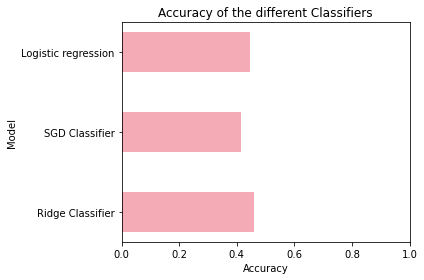

In [10]:
dFColour = df.loc[:,['gender:confidence', 'gender', 'link_color']]
dFColourFiltered = dFColour[(dFColour['gender:confidence'] == 1)&(dFColour['link_color'].str.contains('E\+') != True)&(dFColour['gender']!='unknown')]

feature = 'link_color'
df = dFColourFiltered

# List of the classifiers we tested
modelListColor = [linear_model.RidgeClassifier(), 
             linear_model.SGDClassifier(),
             linear_model.LogisticRegression()
                 ]
modelNamesList = ['Ridge Classifier', 
                  'SGD Classifier',
                  'Logistic regression'
                  ]
acc_color = np.zeros(len(modelListColor))
for i in range(0, len(modelListColor)):

#for i in range(2,3):
#     model_color = modelListColor[i]
    modelName = modelNamesList[i]
    modelListColor[i], voc_color, acc_color[i] = predictors(df, feature, modelListColor[i], modelName, displayResults = False, displayColors=True)


fig, ax1 = plt.subplots()
ax1.set_xlim([0, 1])
bar_width = 0.5
model_number = np.arange(len(modelListColor))+1
rects1 = plt.barh(model_number,acc_color, bar_width, label = 'Brand Predictors', color = '#f5abb5')
plt.yticks(model_number,modelNamesList)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of the different Classifiers')
plt.tight_layout()
plt.show()

Testing Logistic regression model for gender prediction using link_color
Split: 2755 testing and 11023 training samples
model:  Logistic regression


D:\MiniConda\Verzeo_final\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


mse: 1.1383
score:  0.44101633393829404
Best 20 male predictors:


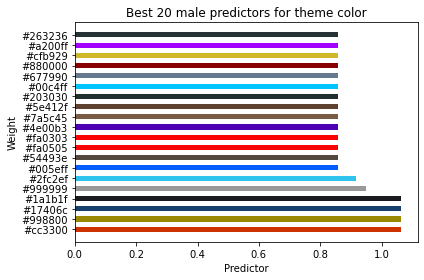

Best 20 male anti-predictors  for theme color:


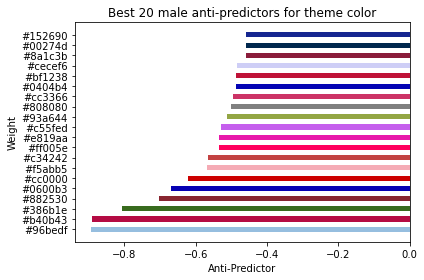

Best 20 female predictors  for theme color:


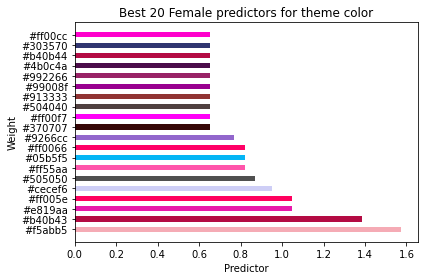

Best 20 Female anti-predictors for theme color:


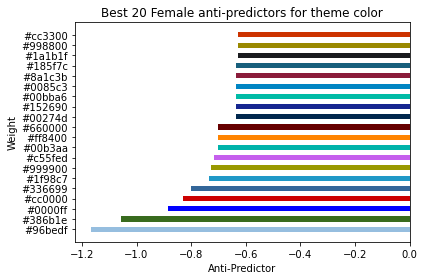

Best 20 brand predictors for theme color:


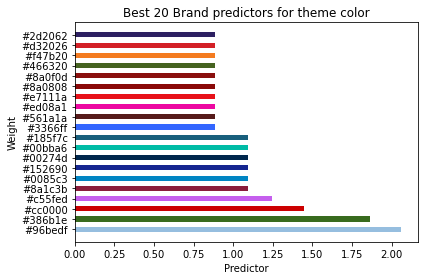

Best 20 Brand anti-predictors for theme color:


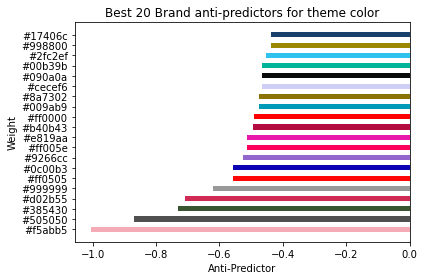

In [11]:
modelName = modelNamesList[2]
modelListColor[2], voc_color, acc_color[2] = predictors(df, feature, modelListColor[2], modelName, displayResults = True, displayColors=True)

From these bar graphs, we can definitely see that our intuitions are confirmed by the models. The strongest female color-predictors are almost all between pink, red and purple. Also, these colors quite strong anti-predictors for both males and brands. However, the linear models only achieve about 45% of accuracy in predicting the gender using only the colors. Once again, this is mostly because the vast majority of users do not change their sidebar link colors.

# Text features exploration

Now that we have seen how users personalize the color of their pages, let's have a deeper look at what they actually write on Twitter. Here, we will explore both the text from the users descriptions but also the text from the tweets themselves. As these two texts lie on different cells in the dataframe, we will first need to process it a bit. The first thing we wanted to do was to normalize the text by removing separators suchs as commas, and also normalize the text itself to have only lowercase letters. To do so, we wrote the _text_normalizer_ function. We then grouped the description and tweet texts together. Finally, we wrote the _compute_bag_of_words_ and _print_most_frequent_ functions to visualize which words are most used by which genders.

Note: Compute_bag_of_words was already written previously for the colour feature exploration.

### First let's write the print_most_frequent() function

In [13]:
def print_most_frequent(bow, vocab, gender, n=20, feature = 'text'):
    switcher = {
        'all_text' : "text"
    }
    featureText =  switcher.get(feature, 'text')
    color_idx = ['brand', 'female', 'male']
    color_table = ['#4a913c', '#f5abb5', '#0084b4']
    label_table = ['Most used words by brands for ' + featureText, 'Most used words by females for ' + featureText, 'Most used words by males for ' + featureText]
    idx = np.argsort(bow.sum(axis=0))
    idx_most_used = np.zeros(n, dtype=int)
    occurence_number = np.zeros(n, dtype=int)
    words_most_used = ["" for x in range(n)]
    for i in range(0,n):
        idx_most_used[i] = idx[0, -1-i]
        words_most_used[i] = vocab[np.int64(idx_most_used[i])]
        occurence_number[i] = (bow.sum(axis=0))[0,idx_most_used[i]]
        

    fig, ax = plt.subplots()
    
    bar_width = 0.5
    word_number = np.arange(n)+1
    rects1 = plt.barh(word_number,occurence_number, bar_width, label = label_table[color_idx.index(gender)], color = color_table[color_idx.index(gender)])
    plt.yticks(word_number,words_most_used)
    plt.ylabel('Most used words')
    plt.xlabel('Number of occurences')
    plt.title(label_table[color_idx.index(gender)])
    plt.tight_layout()
    plt.show()

### Then we'll write the text_normalizer function

In [14]:
def text_normalizer(s):
    #we will normalize the text by using strings, lowercases and removing all the punctuations
    s = str(s) 
    s = s.lower()
    s = re.sub('\W\s',' ',s)
    s = re.sub('\s\W',' ',s)
    s = re.sub('\s+',' ',s) #replace double spaces with single spaces
    
    return s

In [15]:
dataFrameText = pd.read_csv("Information.csv", encoding='latin1')

In [16]:
dataFrameText.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN


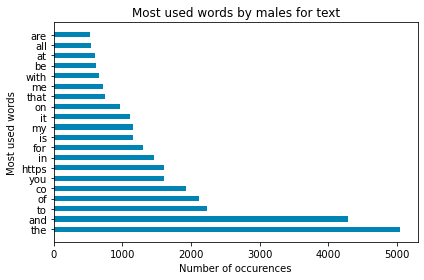

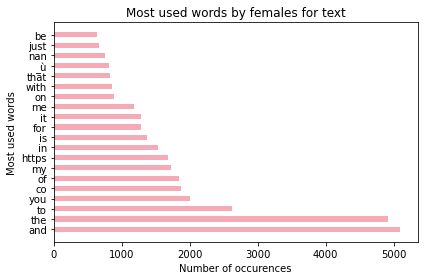

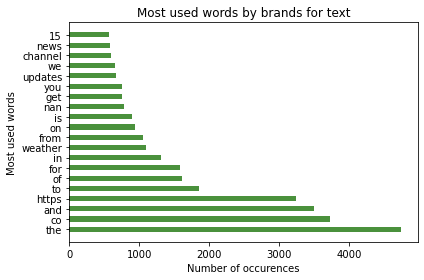

In [17]:
dataFrameText['text_norm'] = [text_normalizer(s) for s in dataFrameText['text']]
dataFrameText['description_norm'] = [text_normalizer(s) for s in dataFrameText['description']]

# Now let's put all the interesting text, i.e. the description and the tweeet itself in one string for each tweet
dataFrameText['all_text'] =dataFrameText['text'].str.cat(dataFrameText['description_norm'],sep=' ')
dataFrameText = dataFrameText[(dataFrameText['gender:confidence']==1)&(dataFrameText['gender']!='unknown')&(dataFrameText['link_color'].str.contains('E\+') != True)]

# Extract separate genders dataframes
male_data = dataFrameText[dataFrameText['gender']=='male']
female_data = dataFrameText[dataFrameText['gender']=='female']
brand_data = dataFrameText[dataFrameText['gender']=='brand']
male_data.head()
        
male_bow, male_voc = compute_bag_of_words(male_data['all_text'])
print_most_frequent(male_bow, male_voc, 'male',  feature = 'all_text')

female_bow, female_voc = compute_bag_of_words(female_data['all_text'])
print_most_frequent(female_bow, female_voc, 'female', feature = 'all_text')

brand_bow, brand_voc = compute_bag_of_words(brand_data['all_text'])
print_most_frequent(brand_bow, brand_voc, 'brand',  feature = 'all_text')

The results are not quite as conclusive as with the colors. In fact, the most used words, regardless of the gender, are very simple words such as "the", "and", "to" or "of", and this does not give us any information about the gender really. One interesting thing we noticed is that the brands tends to use the words "weather", "channel" and "news" more than regular male and female users. This means that we have probably many information or weather channels accounts in our database. Another interesting fact is on the usage of the word "https". It seems like brands tend to post more links than standard users.

Testing Ridge Classifier model for gender prediction using all_text
Split: 2749 testing and 11000 training samples
model:  Ridge Classifier
mse: 0.5915
score:  0.6420516551473263
Testing SGD Classifier model for gender prediction using all_text
Split: 2749 testing and 11000 training samples
model:  SGD Classifier
mse: 0.5820
score:  0.6482357220807566
Testing Logistic regression model for gender prediction using all_text
Split: 2749 testing and 11000 training samples
model:  Logistic regression
mse: 0.5264
score:  0.6667879228810476


D:\MiniConda\Verzeo_final\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


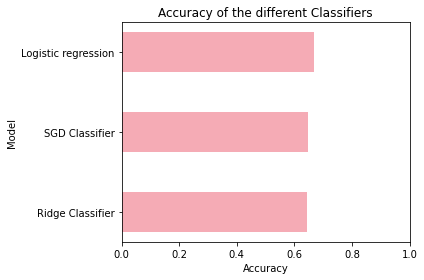

In [18]:
feature = 'all_text'
df = dataFrameText[dataFrameText['_golden']==False]
modelListText = [linear_model.RidgeClassifier(), 
             linear_model.SGDClassifier(),
             linear_model.LogisticRegression(),
             ]
acc_text = np.zeros(len(modelListText))
for i in range(0, len(modelListText)):
#for i in range(2,3):
#     model_text = modelListText[i]
    modelName = modelNamesList[i]
    modelListText[i], voc_text, acc_text[i] = predictors(df, feature, modelListText[i], modelName, displayResults = False)
    
fig, ax1 = plt.subplots()
ax1.set_xlim([0, 1])
bar_width = 0.5
model_number = np.arange(len(modelListText))+1
rects1 = plt.barh(model_number,acc_text, bar_width, label = 'Brand Predictors', color = '#f5abb5')
plt.yticks(model_number,modelNamesList)
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.title('Accuracy of the different Classifiers')
plt.tight_layout()

plt.show()

Testing Logistic regression model for gender prediction using all_text
Split: 2749 testing and 11000 training samples
model:  Logistic regression


D:\MiniConda\Verzeo_final\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


mse: 0.4976
score:  0.6802473626773372
Best 20 male predictors:


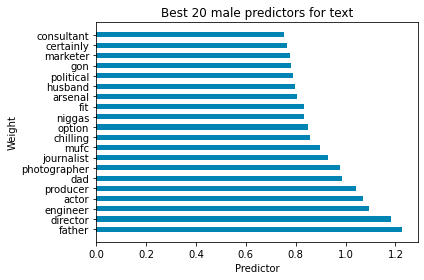

Best 20 male anti-predictors  for text:


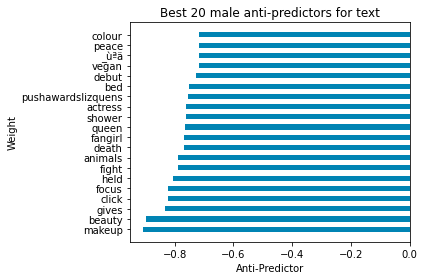

Best 20 female predictors  for text:


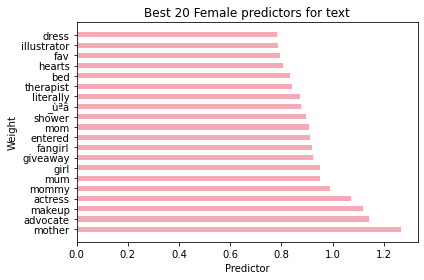

Best 20 Female anti-predictors for text:


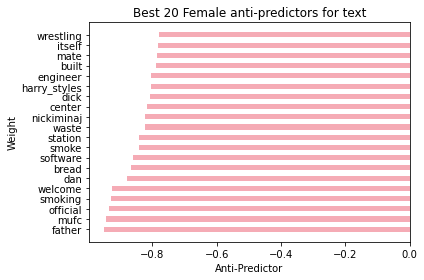

Best 20 brand predictors for text:


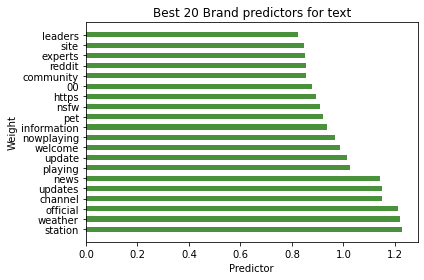

Best 20 Brand anti-predictors for text:


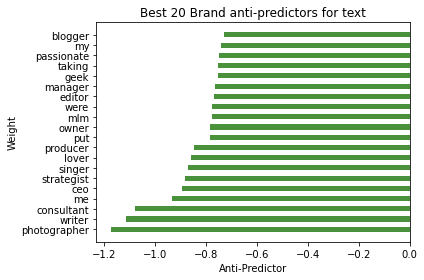

In [19]:
modelName = modelNamesList[2]
modelListText[2], voc_text, acc_text[2] = predictors(df, feature, modelListText[2], modelName, displayResults = True)

Here, as the data is much more varied and meaningful than simple color codes, we manage to obtain a prediction accuracy of about 65%. Strong predictors for male users are words such as "father", "boy", "man" or "niggas", while predictor for female users are "mom", "girl", "feminist" or "makeup", and of course, these words are anti-predictors of the opposite gender.

From the anti-predictors, it seems like female users do not tweet about sports ("player", "hit", "team", "season", "game") while male users are less susceptible to tweet about girls ("girl", "mother", "queen").